## Classification (PA3-1,2,3)

In [1]:
from basic_fcn import *
from utils import *
import torch.optim as optim
import time
from torch.utils.data import DataLoader
import torch
import gc
import copy
from dataloader import *
from starter import *


#hyper param
epochs = 50   
lr = 0.0004
criterion = nn.CrossEntropyLoss()# Choose an appropriate loss function from https://pytorch.org/docs/stable/_modules/torch/nn/modules/loss.html
n_class = 10

print("creating model...")
fcn_model = FCN(n_class=n_class)
fcn_model.apply(init_weights)

# gpu
gpu_status = torch.cuda.is_available()
print("GPU:", gpu_status)

if gpu_status : 
    device = torch.device('cuda') # determine which device to use (gpu or cpu)
else : 
    device = torch.device('cpu')

fcn_model.to(device)
    
print("Training...")
val(fcn_model, 0)  # show the accuracy before training
model_name="latest_model_3"
train_loss_record, valid_loss_record = train(fcn_model, epochs,lr, save_fp=model_name) 

C:\ProgramData\Anaconda3\lib\site-packages\torchvision\io\image.py:11: UserWarning: Failed to load image Python extension: Could not find module 'C:\ProgramData\Anaconda3\Lib\site-packages\torchvision\image.pyd' (or one of its dependencies). Try using the full path with constructor syntax.
  warn(f"Failed to load image Python extension: {e}")


status : GPU
creating model...
GPU: True
Training...


C:\ProgramData\Anaconda3\lib\site-packages\torchvision\transforms\functional.py:126: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:189.)
  img = torch.from_numpy(pic.transpose((2, 0, 1))).contiguous()


Loss at epoch: 0 is 3.6186583042144775
IoU at epoch: 0 is 0.012632065859428965
Pixel acc at epoch: 0 is 0.044047847390174866
epoch0, iter0, loss: 2.7668333053588867
epoch0, iter10, loss: 2.107712507247925
epoch0, iter20, loss: 1.6970906257629395
epoch0, iter30, loss: 1.5152561664581299
epoch0, iter40, loss: 1.318973183631897
epoch0, iter50, loss: 1.21345853805542
Finish epoch 0, time elapsed 61.22711110115051
Loss at epoch: 0 is 1.3165622098105294
IoU at epoch: 0 is 0.21114900695767755
Pixel acc at epoch: 0 is 0.6743405887058803
epoch1, iter0, loss: 1.4473947286605835
epoch1, iter10, loss: 1.1173430681228638
epoch1, iter20, loss: 1.0752044916152954
epoch1, iter30, loss: 1.015151023864746
epoch1, iter40, loss: 1.1180061101913452
epoch1, iter50, loss: 0.9667394161224365
Finish epoch 1, time elapsed 61.217249155044556
Loss at epoch: 1 is 0.9211343782288688
IoU at epoch: 1 is 0.28077025343537526
Pixel acc at epoch: 1 is 0.7695884363991874
epoch2, iter0, loss: 0.8064281940460205
epoch2, ite

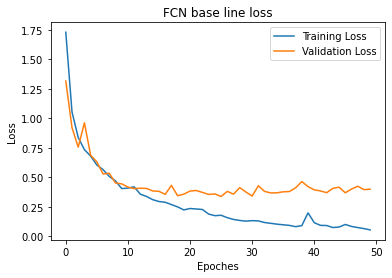

In [2]:
#plot
plt.plot(np.arange(epochs), train_loss_record, label= "Training Loss")
plt.plot(np.arange(epochs), valid_loss_record, label="Validation Loss")
plt.xlabel("Epoches")
plt.ylabel("Loss")
plt.legend()
plt.title("FCN base line loss")
plt.savefig("Q3")
plt.show()

in test
Loss :is 0.3443231242043631
IoU is 0.5157444486791815
Pixel is 0.9098522918564933


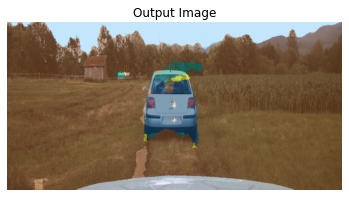

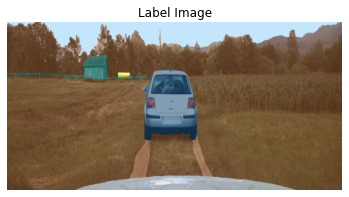

0

In [4]:
def test(model_name):
    print("in test")
    #TODO: load the best model and complete the rest of the function for testing
    fcn_model = torch.load(model_name)

    fcn_model.eval()
    
    losses = []
    mean_iou_scores = []
    accuracy = []

    with torch.no_grad(): # we don't need to calculate the gradient in the validation/testing

        for iter, (inputs, labels, rawimg) in enumerate(test_loader):
    
            # both inputs and labels have to reside in the same device as the model's
            inputs = inputs.to(device) #transfer the input to the same device as the model's
            labels = labels.type(torch.LongTensor).to(device) #transfer the labels to the same device as the model's

            output = fcn_model(inputs)

            loss = criterion(output,labels) #calculate the loss
            losses.append(loss.item()) #call .item() to get the value from a tensor. The tensor can reside in gpu but item() will still work 

            pred = torch.argmax(output, axis = 1) # Make sure to include an argmax to get the prediction from the outputs of your model

            mean_iou_scores.append(np.nanmean(iou_ey(pred, labels, n_class)))  # Complete this function in the util, notice the use of np.nanmean() here
        
            accuracy.append(pixel_acc_ey(pred, labels)) # Complete this function in the util


    print(f"Loss :is {np.mean(losses)}")
    print(f"IoU is {np.mean(mean_iou_scores)}")
    print(f"Pixel is {np.mean(accuracy)}")
    return 0


def visualize(model_name,test_loader):
    #TODO: load the best model and complete the rest of the function for testing
    fcn_model = torch.load(model_name)
    fcn_model.eval()
    inputimg = []
    pred = []
    with torch.no_grad(): # we don't need to calculate the gradient in the validation/testing
        for iter, (input, label, orgin_img) in enumerate(test_loader):
            inputimg = orgin_img[0]
            input = input.to(device) #transfer the input to the same device as the model's
            label = label.type(torch.LongTensor).to(device) #transfer the labels to the same device as the model's
            output = fcn_model(input)
            pred = torch.argmax(output, axis = 1) # Make sure to include an argmax to get the prediction from the outputs of your model

    class2color = {}
    for k, v in test_dataset.color2class.items():
        class2color[v] = k    

    imgs = []
    for row in pred[0]:
        for col in row:
            imgs.append(class2color[int(col)])
    imgs = np.asarray(imgs).reshape(pred.shape[1], pred.shape[2], 3)
    outputimg = PIL.Image.fromarray(np.array(imgs, dtype=np.uint8))
    plt.axis('off')
    plt.imshow(inputimg)
    plt.imshow(outputimg, alpha=0.5)


    plt.title('Output Image')
    plt.show()
    
    imgs = []
    for rows in label[0]:
        for col in rows:
            imgs.append(class2color[int(col)])
    imgs = np.asarray(imgs).reshape(pred.shape[1], pred.shape[2], 3)
    outputimg = PIL.Image.fromarray(np.array(imgs, dtype=np.uint8))
    plt.axis('off')
    plt.imshow(inputimg)
    plt.imshow(outputimg, alpha=0.5)

    plt.title('Label Image')
    plt.show()    

    return 0




model_name = 'latest_model_3'
test(model_name)
visualize(model_name,test_loader)